# Spy Machine Learning Models -- Intraday

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
import mpl_finance as mpf
from mpl_finance import candlestick_ohlc
import matplotlib.ticker as mticker
from datetime import date
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.graph_objects as go
import yfinance as yf
import pandas_ta as ta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
spy_1 = yf.download(
        tickers = "SPY",
        period = "1mo",
        interval = "5m",
        group_by = 'column',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [78]:
spy_1

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-19 09:30:00-05:00,378.339996,378.769989,377.980011,378.149994,378.149994,3057769
2021-01-19 09:35:00-05:00,378.149994,378.279999,377.950012,378.059509,378.059509,772327
2021-01-19 09:40:00-05:00,378.079987,378.230011,377.869995,377.899994,377.899994,612058
2021-01-19 09:45:00-05:00,377.898499,378.089996,377.390015,377.440002,377.440002,713468
2021-01-19 09:50:00-05:00,377.369995,377.600006,377.290009,377.357788,377.357788,767408
...,...,...,...,...,...,...
2021-02-16 15:35:00-05:00,392.799988,392.938812,392.290009,392.420013,392.420013,517981
2021-02-16 15:40:00-05:00,392.403015,392.721893,392.329987,392.679993,392.679993,552413
2021-02-16 15:45:00-05:00,392.649994,392.729889,392.399994,392.489990,392.489990,996981


In [53]:
spy = yf.download(
        tickers = "SPY",
        period = "1mo",
        interval = "5m",
        group_by = 'column',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [54]:
NonMPStrategy = ta.Strategy(
    name="EMAs, BBs, and MACD",
    description=" Strategy by rename Columns",
    ta=[
        {"kind": "ema", "length": 8},
        {"kind": "ema", "length": 21},
        {"kind": "rsi", "col_names": 'RSI' },
        {"kind": "bbands", "length": 20, "col_names": ("BBL", "BBM", "BBU")},
        {"kind": "macd", "fast": 8, "slow": 21, "col_names": ("MACD", "MACD_H", "MACD_S")}
    ]
)
# Run it
spy.ta.strategy(NonMPStrategy)

In [55]:
spy_intra = spy

In [56]:
spy_intra.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2021-01-19 09:30:00-05:00 to 2021-02-16 15:55:00-05:00
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1560 non-null   float64
 1   high       1560 non-null   float64
 2   low        1560 non-null   float64
 3   close      1560 non-null   float64
 4   adj_close  1560 non-null   float64
 5   volume     1560 non-null   int64  
 6   EMA_8      1553 non-null   float64
 7   EMA_21     1540 non-null   float64
 8   RSI_14     1559 non-null   float64
 9   BBL        1541 non-null   float64
 10  BBM        1541 non-null   float64
 11  BBU        1541 non-null   float64
 12  MACD       1540 non-null   float64
 13  MACD_H     1540 non-null   float64
 14  MACD_S     1552 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 195.0 KB


In [57]:
spy_intra.dropna()

,open,high,low,close,adj_close,volume,EMA_8,EMA_21,RSI_14,BBL,BBM,BBU,MACD,MACD_H,MACD_S
datetime,,,,,,,,,,,,,,,
2021-01-19 11:10:00-05:00,377.535004,377.700012,377.220001,377.299896,377.299896,245793,377.626566,377.646669,40.375198,377.084188,377.621503,378.158817,-0.020103,-0.005141,-0.014962
2021-01-19 11:15:00-05:00,377.279999,377.279999,376.750000,377.045013,377.045013,587289,377.497332,377.591973,36.373694,377.016296,377.570778,378.125260,-0.094641,-0.063743,-0.030898
2021-01-19 11:20:00-05:00,377.040009,377.230011,376.890015,377.149994,377.149994,856637,377.420146,377.551793,39.052948,376.971151,377.533278,378.095405,-0.131647,-0.080600,-0.051048
2021-01-19 11:25:00-05:00,377.144989,377.420013,377.001099,377.390015,377.390015,351746,377.413450,377.537086,44.778418,376.966465,377.530779,378.095092,-0.123636,-0.058071,-0.065565
2021-01-19 11:30:00-05:00,377.385010,377.454987,377.040009,377.140015,377.140015,239196,377.352687,377.500989,40.509737,376.933547,377.519890,378.106232,-0.148302,-0.066189,-0.082113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16 15:35:00-05:00,392.799988,392.938812,392.290009,392.420013,392.420013,517981,392.684543,392.771585,40.608198,392.424799,392.837387,393.249975,-0.087042,-0.052239,-0.034804
2021-02-16 15:40:00-05:00,392.403015,392.721893,392.329987,392.679993,392.679993,552413,392.683532,392.763259,47.683648,392.420024,392.835387,393.250749,-0.079727,-0.035938,-0.043789
2021-02-16 15:45:00-05:00,392.649994,392.729889,392.399994,392.489990,392.489990,996981,392.640522,392.738416,43.595949,392.377373,392.820386,393.263399,-0.097894,-0.043284,-0.054610


In [58]:
spy_intra['volume'] = spy_intra['volume'].astype('float64')

In [59]:
spy_intra.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2021-01-19 09:30:00-05:00 to 2021-02-16 15:55:00-05:00
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1560 non-null   float64
 1   high       1560 non-null   float64
 2   low        1560 non-null   float64
 3   close      1560 non-null   float64
 4   adj_close  1560 non-null   float64
 5   volume     1560 non-null   float64
 6   EMA_8      1553 non-null   float64
 7   EMA_21     1540 non-null   float64
 8   RSI_14     1559 non-null   float64
 9   BBL        1541 non-null   float64
 10  BBM        1541 non-null   float64
 11  BBU        1541 non-null   float64
 12  MACD       1540 non-null   float64
 13  MACD_H     1540 non-null   float64
 14  MACD_S     1552 non-null   float64
dtypes: float64(15)
memory usage: 195.0 KB


In [70]:
def feature_imp(data):
    corrmat=data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,)
    plt.title('Correlation between different fearures and target')
    plt.show()
    return

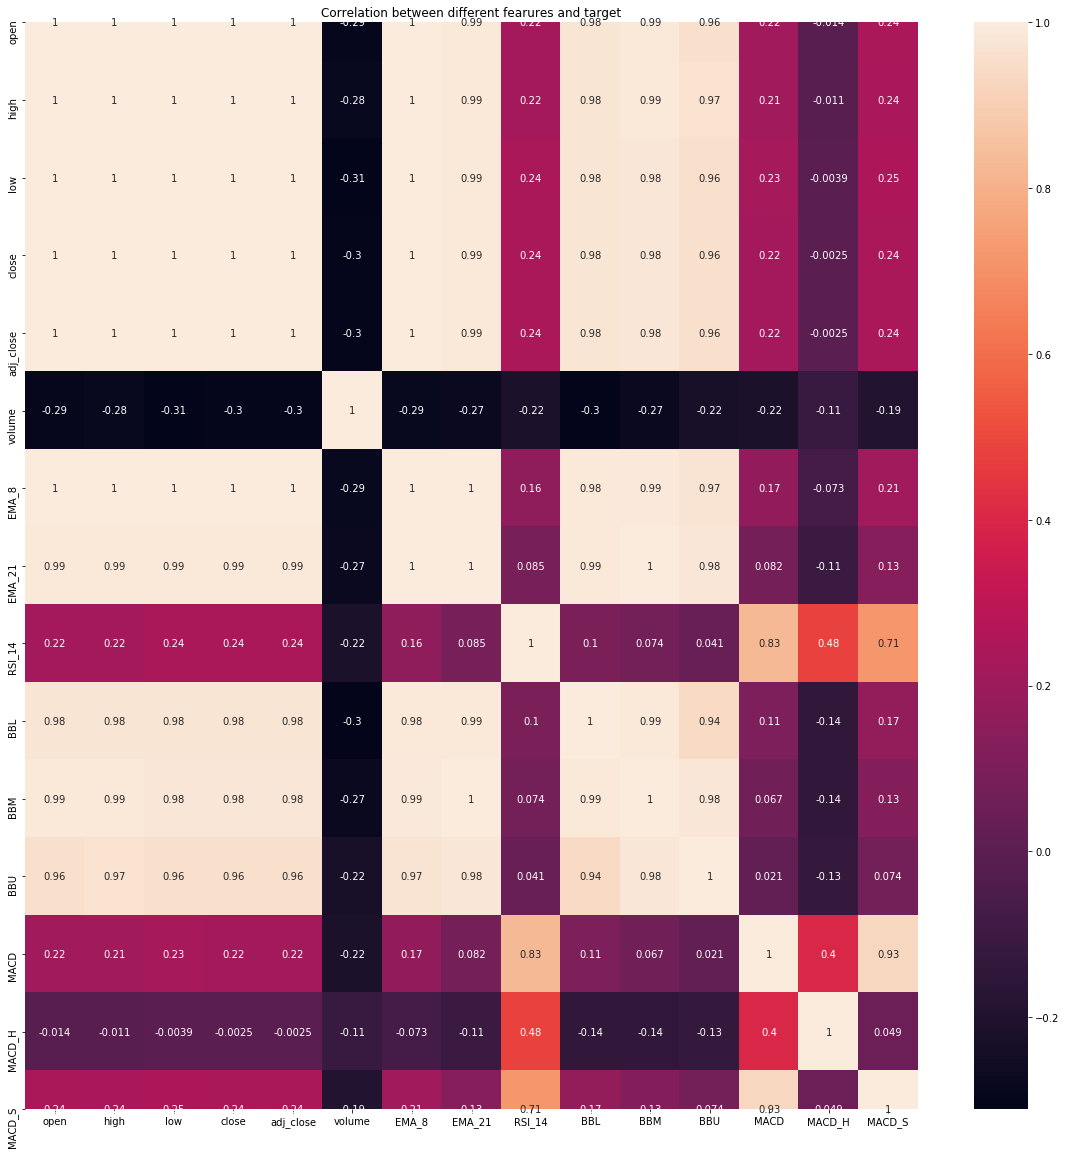

In [71]:
feature_imp(spy_intra)

In [79]:
def modeling(data):
    X = data.drop(['Close'], axis=1)
    Y=data['Close']
    xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state = 0)
    models = []

    models.append(('KNN' , KNeighborsClassifier()))
    models.append(('CART' , DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)))
    models.append(('NB' , GaussianNB()))
    models.append(('SVM' , SVC()))
    models.append(('RF' , RandomForestClassifier(n_estimators=60)))
    models.append(('XGBoost', XGBClassifier(gamma=0.0, n_estimators=60,base_score=0.7, max_depth=3, objective = "binary:logistic", colsample_bytree=1,learning_rate=0.01)))
    
    results = []
    names = []

    for name, model in models:
        clf = model
        clf.fit(xTrain, yTrain)
        y_pred = clf.predict(xTest)
        accu_score = accuracy_score(yTest, y_pred)
        results.append([name, accu_score])
        #print(name + ": " + str(accu_score))
    re=pd.DataFrame(results, columns=['Model', 'Acuracy_Score'])
    re.set_index(['Model'])
    return re

In [80]:
modeling(spy_1)

ValueError: Unknown label type: 'continuous'